# Functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

def DTFT(y,M,a,N,W):
    Y = [0 for i in range(N)]
    for i in range(N):
        for k in range(M):
            Y[i] += y[k]*np.exp((-1j)*W[i]*(a+k))
    return Y

def sum_n(X,H,n): #convolution sum for a particular n
    su=0
    for k in range(len(X)):
        if (n-k)>=0 and (n-k)<len(H):
            su=su+X[k]*H[n-k]
    return su

#convolution for the given sequences    
def convolution(X,H):
    Y=[]
    for i in range(len(H)+len(X)-1):
        Y.append(sum_n(X,H,i))
    return Y

def convolution_x(X,H,a_x,a_h):
    x = [i for i in range(a_x+a_h,a_x+a_h+len(X)+len(H)-1)]
    return x

def  convolution_wav(X,H,framerate,nchannels,sampwidth,choice,str_1):
	Y=[]
	for i in range(len(H)+len(X)-1):
		Y.append(sum_n(X,H,i))
    
	for i in range(len(Y)):
		if Y[i]<0:
			Y[i] = 0
		elif Y[i]>255:
			Y[i] = 255
		else:
			Y[i] = round(Y[i])

	Y_arr=np.asarray(Y)	 #list to array
	Y_1=(Y_arr).astype('b') #converting into bytes
	y_n=wave.open(str_1[:-4]+"_conv_with_"+str(choice)+"_seq"+".wav","w")#file of the form: wow_conv_with_1_seq.wav
	y_n.setnchannels(nchannels) #writing the data to a .wav file
	y_n.setsampwidth(sampwidth)
	y_n.setframerate(framerate)
	y_n.writeframes(Y_1.tobytes())
	y_n.close()
	return Y

N = 1000
W = np.linspace((-1)*np.pi, np.pi, num=N, endpoint=False)

# Question 1

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


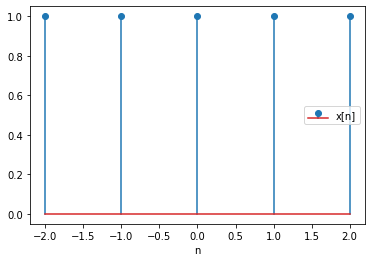

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


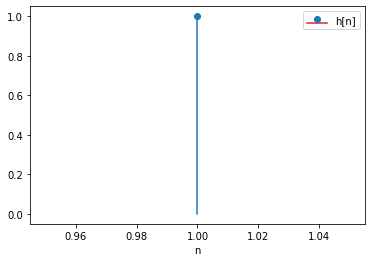

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


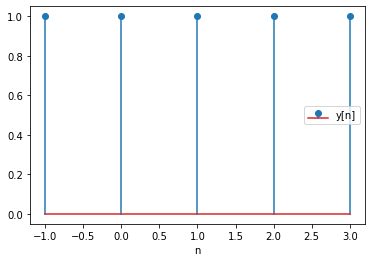

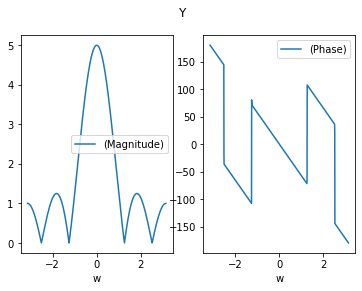

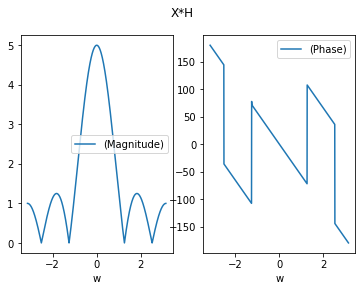

Therefore, from the graphs, we can see that Y(W) = X(W)*H(W)


In [57]:
x = [1,1,1,1,1]
h = [1]
a_x = -2 #corresponding x value of first element of x
a_h = 1 #corresponding x value of first element of h

y = convolution(x,h)
y_xval = convolution_x(x,h,a_x,a_h)

plt.xlabel('n')
plt.stem([i for i in range(a_x,a_x+len(x))],x,label='x[n]')
plt.legend()
plt.show()

plt.xlabel('n')
plt.stem([i for i in range(a_h,a_h+len(h))],h,label='h[n]')
plt.legend()
plt.show()

plt.xlabel('n')
plt.stem(y_xval,y,label='y[n]')
plt.legend()
plt.show()

Y = DTFT(y,len(y),a_x+a_h,N,W)
Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i]) #Magnitude
Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True) #Phase

X = DTFT(x,len(x),a_x,N,W)
X_mag = [0 for i in range(N)]
for i in range(N):
    X_mag[i] = np.abs(X[i]) #Magnitude
X_ph = [0 for i in range(N)]
for i in range(N):
    X_ph[i] = np.angle(X[i], deg=True) #Phase

H = DTFT(h,len(h),a_h,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

XH = [X[i]*H[i] for i in range(N)]
XH_mag = [0 for i in range(N)]
for i in range(N):
    XH_mag[i] = np.abs(XH[i]) #Magnitude
XH_ph = [0 for i in range(N)]
for i in range(N):
    XH_ph[i] = np.angle(XH[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,Y_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,Y_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.suptitle("Y")
plt.show()

plt.subplot(1,2,1)
plt.plot(W,XH_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,XH_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.suptitle("X*H")
plt.show()

print("Therefore, from the graphs, we can see that Y(W) = X(W)*H(W)")

# Question 2(a)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


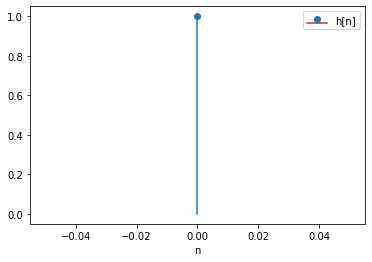

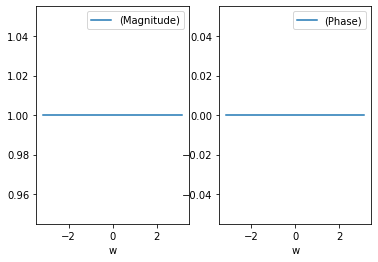

Therfore, from the magnitude graph, we can see that this systems gives output identical to the input. Also it is a linear phase system.


In [5]:
h = [1]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therfore, from the magnitude graph, we can see that this systems gives output identical to the input. Also it is a linear phase system.")

# Question 2(b)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


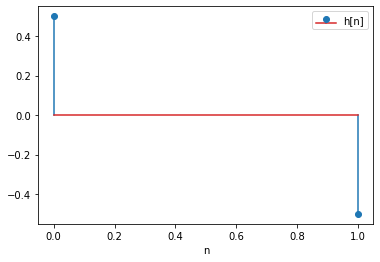

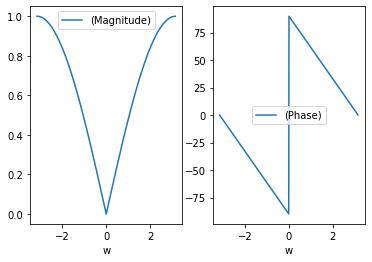

Therefore, from the magitude graph, we can see that this system attenuates lower frequency components and passes higher frequency components nearly the same. Also, it is a linear phase system.


In [7]:
h = [0.5,-0.5]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system attenuates lower frequency components and passes higher frequency components nearly the same. Also, it is a linear phase system.")

# Question 2(c)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


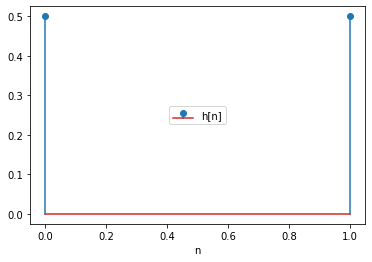

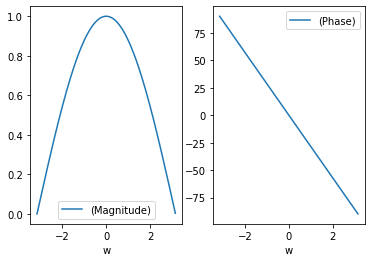

Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.


In [8]:
h = [0.5,0.5]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.")

# Question 2(d)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


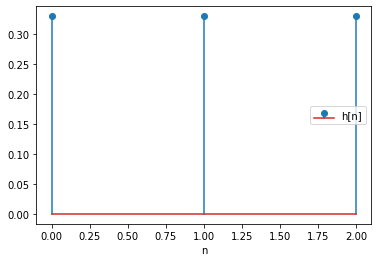

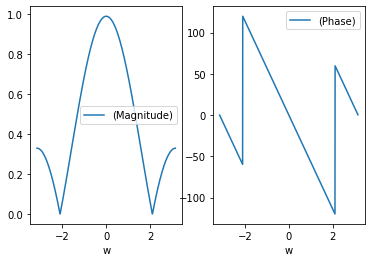

Therefore, from the magitude graph, we can see that this system attenuates components of a particular frequency and does not deviate the other frequency components by a lot. Also, it is a linear phase system.


In [9]:
h = [0.33,0.33,0.33]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system attenuates components of a particular frequency, does not deviate lower frequency components by a lot and only slightly attenuates higher frequencies. Also, it is a linear phase system.")

# Question 2(e)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


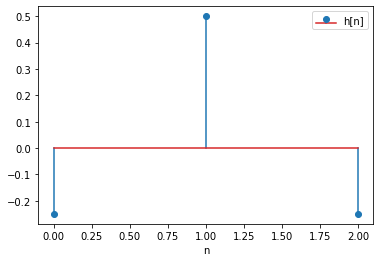

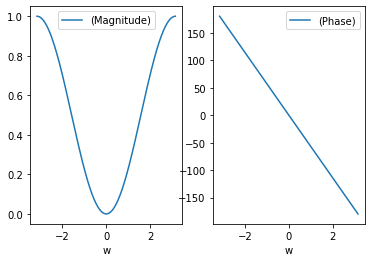

Therefore, from the magitude graph, we can see that this system attenuates lower frequency components and passes higher frequency components nearly the same. Also, it is a linear phase system.


In [10]:
h = [-0.25,0.5,-0.25]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system attenuates lower frequency components and passes higher frequency components nearly the same. Also, it is a linear phase system.")

# Question 2(f)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


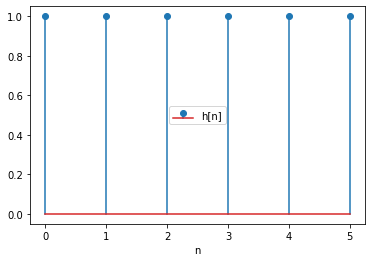

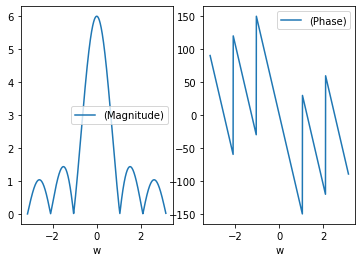

Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.


In [11]:
h = [1,1,1,1,1,1]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.")

# Question 2(g)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


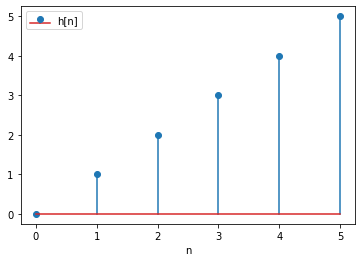

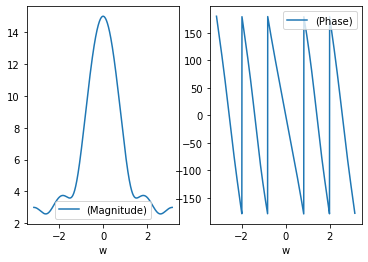

Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, since the magnitude is always greater than 2, it amplifies all the frequencies of the input signal. Also, it is a linear phase system.


In [13]:
h = [i for i in range(6)]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, since the magnitude is always greater than 2, it amplifies all the frequencies of the input signal. Also, it is a linear phase system.")

# Question 2(h)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


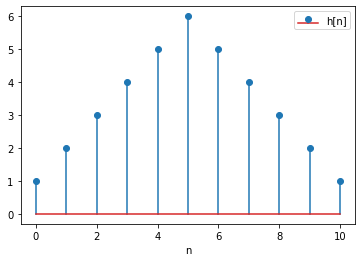

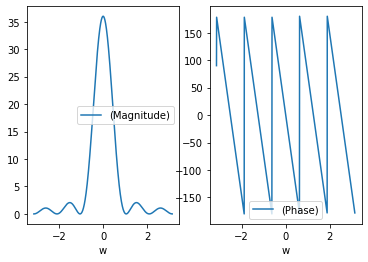

Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.


In [14]:
h = [1,2,3,4,5,6,5,4,3,2,1]
plt.xlabel('n')
plt.stem(h,label='h[n]')
plt.legend()
plt.show()

H = DTFT(h,len(h),0,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system passes lower frequency components nearly the same and attenuates higher frequency components. Also, it is a linear phase system.")

# Question 2(i)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


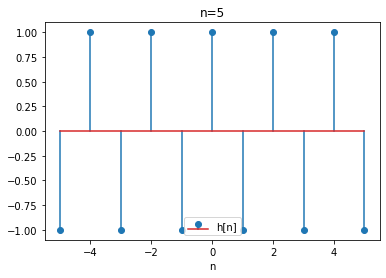

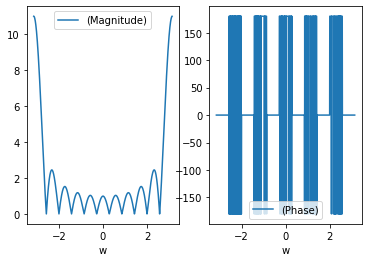

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


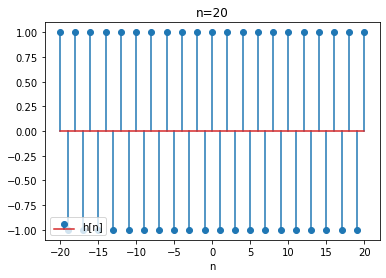

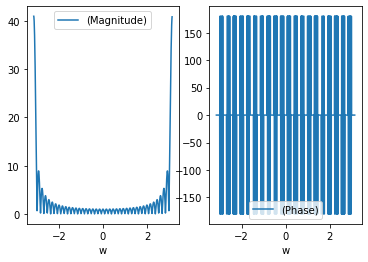

Therefore, from the magitude graph, we can see that this system amplifies frequency components at pi by a lot compared to other frequencies. Also, it completely attenuates particular frequencies. As n increases, the relative amplification of components at pi starts increasing rapidly and many components start getting completely attenuated.


In [23]:
n = 5
h = [np.cos(np.pi*i) for i in range(-n,n+1)]
x = [i for i in range(-n,n+1)]
plt.xlabel('n')
plt.stem(x,h,label='h[n]')
plt.title("n=5")
plt.legend()
plt.show()

H = DTFT(h,len(h),-n,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

n = 20
h = [np.cos(np.pi*i) for i in range(-n,n+1)]
x = [i for i in range(-n,n+1)]
plt.xlabel('n')
plt.stem(x,h,label='h[n]')
plt.title("n=20")
plt.legend()
plt.show()

H = DTFT(h,len(h),-n,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(1,2,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(1,2,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("Therefore, from the magitude graph, we can see that this system amplifies frequency components at pi by a lot compared to other frequencies. Also, it completely attenuates particular frequencies. As n increases, the relative amplification of components at pi starts increasing rapidly and many components start getting completely attenuated.")

# Question 2(j)

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


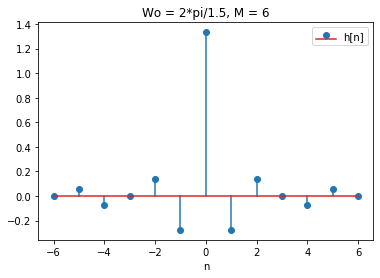

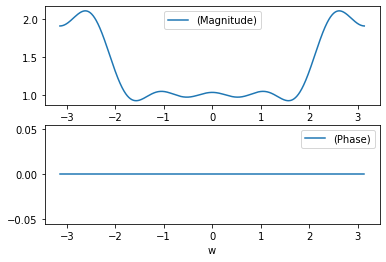

C:\Users\pyagn\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


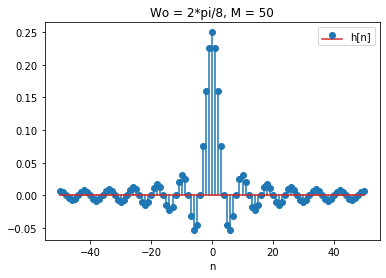

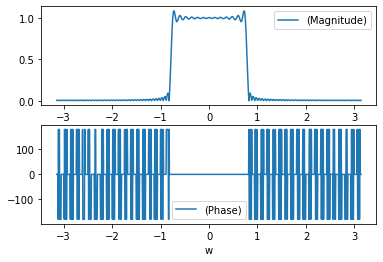

From the magnitude graph, we can see that as Wo changes, the shape and scale of the graph change and as M increases, the sharpness of the graph increases. When Wo = 2*pi/1.5 and M = 6, it attenuates lower frequencies and passes higher frequencies. When Wo = 2*pi/8 and M = 50, it passes lower frequencies and attenuates higher frequencies.


In [49]:
n = 6 #M in the question
Wo = 2*np.pi/1.5
h1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h2 = [Wo/np.pi]
h3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h = h1+h2+h3
x = [i for i in range(-n,n+1)]
plt.xlabel('n')
plt.stem(x,h,label='h[n]')
plt.title("Wo = 2*pi/1.5, M = 6")
plt.legend()
plt.show()

H = DTFT(h,len(h),-n,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase
    H_ph[i] = np.round(H_ph[i],decimals=4)

plt.subplot(2,1,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(2,1,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

n = 50 #M in the question
Wo = 2*np.pi/8
h1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h2 = [Wo/np.pi]
h3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h = h1+h2+h3
x = [i for i in range(-n,n+1)]
plt.xlabel('n')
plt.stem(x,h,label='h[n]')
plt.title("Wo = 2*pi/8, M = 50")
plt.legend()
plt.show()

H = DTFT(h,len(h),-n,N,W)
H_mag = [0 for i in range(N)]
for i in range(N):
    H_mag[i] = np.abs(H[i]) #Magnitude
H_ph = [0 for i in range(N)]
for i in range(N):
    H_ph[i] = np.angle(H[i], deg=True) #Phase

plt.subplot(2,1,1)
plt.plot(W,H_mag,label='(Magnitude)')
plt.xlabel('w')
plt.legend()
plt.subplot(2,1,2)
plt.plot(W,H_ph,label='(Phase)')
plt.xlabel('w')
plt.legend()
plt.show()

print("From the magnitude graph, we can see that as Wo changes, the shape and scale of the graph change and as M increases, the sharpness of the graph increases. When Wo = 2*pi/1.5 and M = 6, it attenuates lower frequencies and passes higher frequencies. When Wo = 2*pi/8 and M = 50, it passes lower frequencies and attenuates higher frequencies.")

# Question 3

## Alarm.wav

### Convolution with (a)

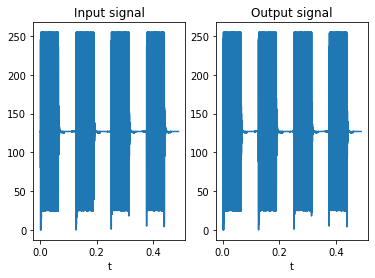

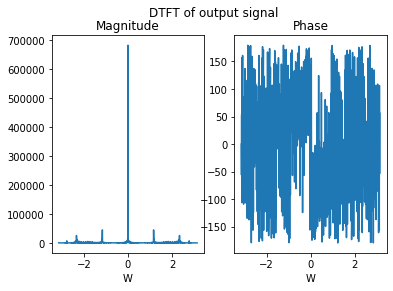

Since convolution in time domain is multiplication in frequency domain, as expected from Q2, we can see that the DTFT spectrum of the output is the same as that of the input.


In [50]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [1]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("Since convolution in time domain is multiplication in frequency domain, as expected from Q2, we can see that the DTFT spectrum of the output is the same as that of the input.")

### Convolution with (b)

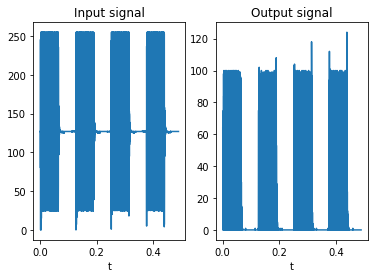

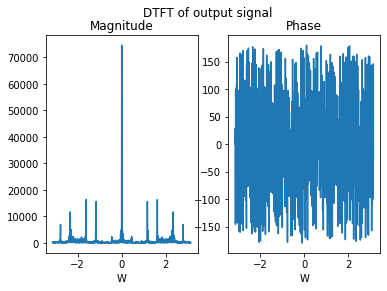

As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.


In [51]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0.5,-0.5]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.")

### Convolution with (c)

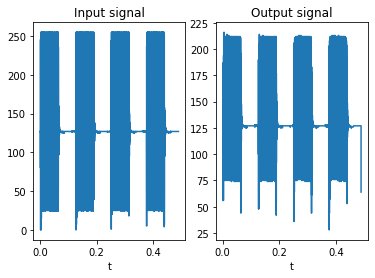

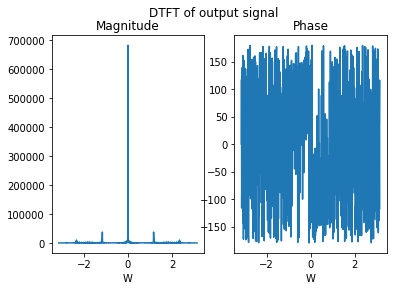

As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.


In [52]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_3 = [0.5,0.5]
a_h = 0
ch = 3
y = convolution_wav(signal,h_3,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (d)

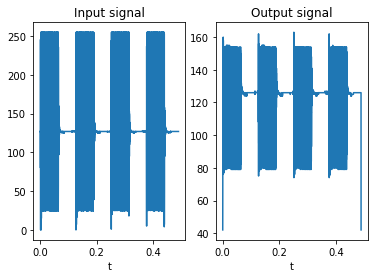

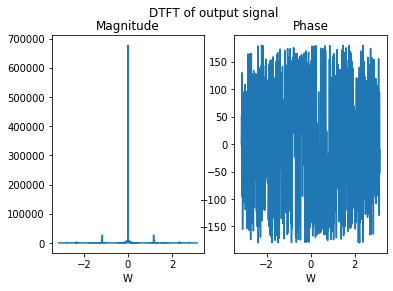

As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.


In [2]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_4 = [0.33,0.33,0.33]
a_h = 0
ch = 4
y = convolution_wav(signal,h_4,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (e)

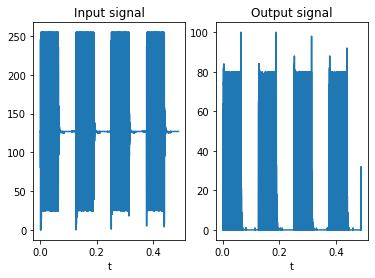

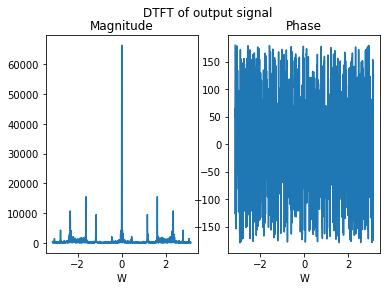

As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.


In [3]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_5 = [-0.25,0.50,-0.25]
a_h = 0
ch = 5
y = convolution_wav(signal,h_5,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.")

### Convolution with (f)

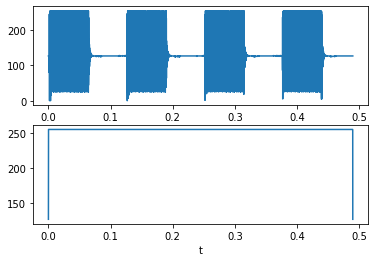

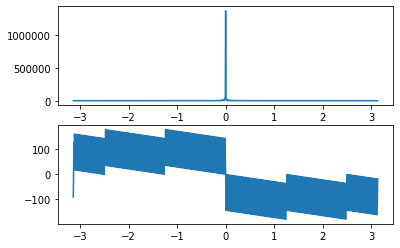

In [38]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_6 = [1,1,1,1,1,1]
a_h = 0
ch = 6
y = convolution_wav(signal,h_6,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (g)

In [ ]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_7 = [i for i in range(6)]
a_h = 0
ch = 7
y = convolution_wav(signal,h_7,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (h)

In [ ]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_8 = [1,2,3,4,5,6,5,4,3,2,1]
a_h = 0
ch = 8
y = convolution_wav(signal,h_8,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (i)

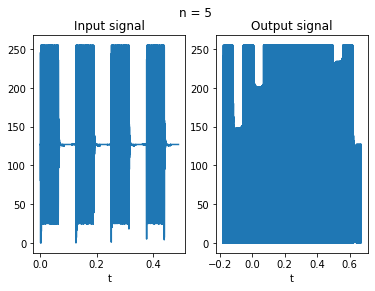

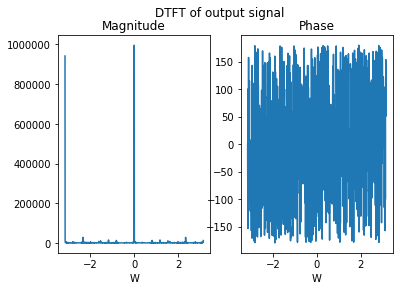

As expected from Q2, the other frequencies are attenuated as compared to those at pi and higher ones. Also, some specific frequencies are completely attenuated.


In [5]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
n = 2000
h_9 = [np.cos(np.pi*i) for i in range(-n,n+1)]
a_h = -n
ch = 9
y = convolution_wav(signal,h_9,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("n = 5")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

"""n = 2000
h_9 = [np.cos(np.pi*i) for i in range(-n,n+1)]
a_h = -n
ch = 9
y = convolution_wav(signal,h_9,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("n = 20")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()"""

print("As expected from Q2, the other frequencies are attenuated as compared to those at pi and higher ones. Also, some specific frequencies are completely attenuated.")

### Convolution with (j)

In [ ]:
str_1 = "alarm.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
n = 6 #M in the question
Wo = 2*np.pi/1.5
h_1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h_2 = [Wo/np.pi]
h_3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h10 = h_1+h_2+h_3
a_h = -n
ch = 10
y = convolution_wav(signal,h_10,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("Wo = 2*pi/1.5, M = 6")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

n = 50 #M in the question
Wo = 2*np.pi/8
h_1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h_2 = [Wo/np.pi]
h_3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h10 = h_1+h_2+h_3
a_h = -n
ch = 10
y = convolution_wav(signal,h_10,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("Wo = 2*pi/8, M = 50")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones in the first case and the higher frequencies are attenuated as compared to the lower ones in the second case.")

## Cry.wav

### Convolution with (a)

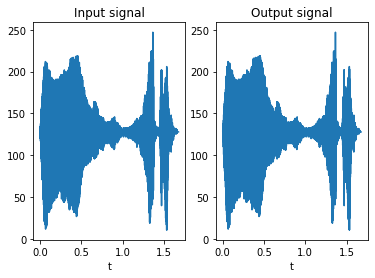

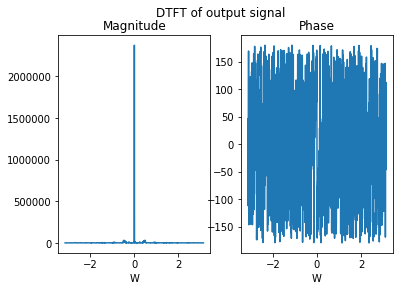

Since convolution in time domain is multiplication in frequency domain, as expected from Q2, we can see that the DTFT spectrum of the output is the same as that of the input.


In [4]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_1 = [1]
a_h = 0
ch = 1
y = convolution_wav(signal,h_1,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("Since convolution in time domain is multiplication in frequency domain, as expected from Q2, we can see that the DTFT spectrum of the output is the same as that of the input.")

### Convolution with (b)

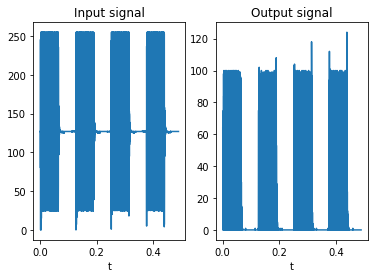

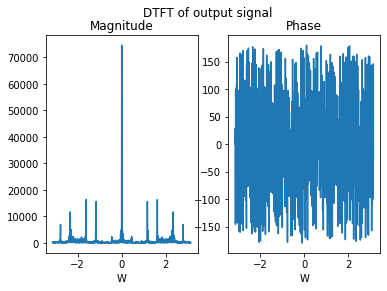

As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.


In [51]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_2 = [0.5,-0.5]
a_h = 0
ch = 2
y = convolution_wav(signal,h_2,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.")

### Convolution with (c)

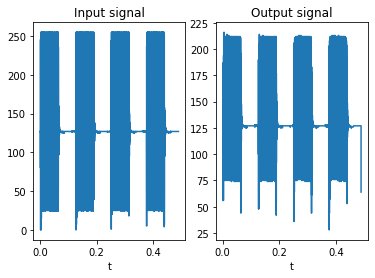

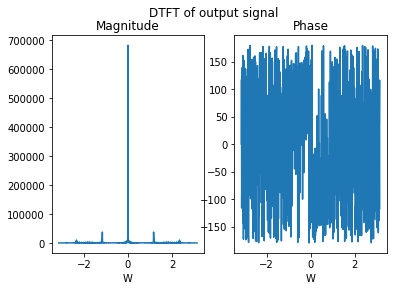

As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.


In [52]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_3 = [0.5,0.5]
a_h = 0
ch = 3
y = convolution_wav(signal,h_3,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (d)

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_4 = [0.33,0.33,0.33]
a_h = 0
ch = 4
y = convolution_wav(signal,h_4,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (e)

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_5 = [-0.25,0.50,-0.25]
a_h = 0
ch = 5
y = convolution_wav(signal,h_5,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones.")

### Convolution with (f)

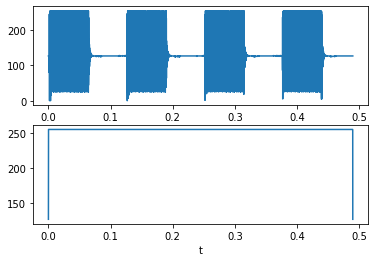

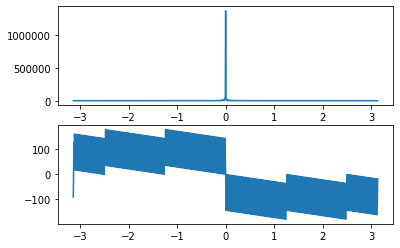

In [38]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_6 = [1,1,1,1,1,1]
a_h = 0
ch = 6
y = convolution_wav(signal,h_6,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (g)

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_7 = [i for i in range(6)]
a_h = 0
ch = 7
y = convolution_wav(signal,h_7,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (h)

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
h_8 = [1,2,3,4,5,6,5,4,3,2,1]
a_h = 0
ch = 8
y = convolution_wav(signal,h_8,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [i/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the higher frequencies are attenuated as compared to the lower ones.")

### Convolution with (i)

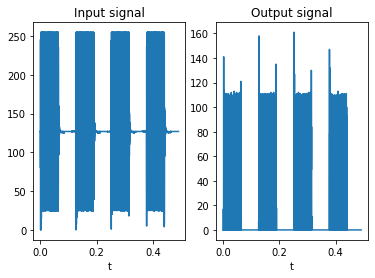

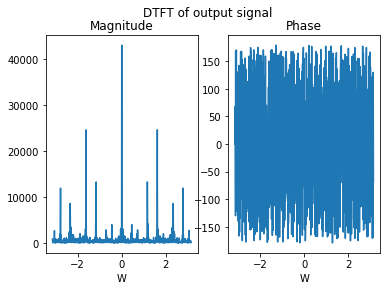

In [4]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
n = 5
h_9 = [np.cos(np.pi*i) for i in range(-n,n+1)]
a_h = -n
ch = 9
y = convolution_wav(signal,h_9,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("n = 5")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

n = 20
h_9 = [np.cos(np.pi*i) for i in range(-n,n+1)]
a_h = -n
ch = 9
y = convolution_wav(signal,h_9,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("n = 20")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the other frequencies are attenuated as compared to those at pi and higher ones. Also, some specific frequencies are completely attenuated.")

### Convolution with (j)

In [ ]:
str_1 = "cry.wav"
raw=wave.open(str_1)
params = raw.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
signal = raw.readframes(-1) #reading all frames
signal = np.frombuffer(signal, dtype="uint8") 
raw.close()
n = 6 #M in the question
Wo = 2*np.pi/1.5
h_1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h_2 = [Wo/np.pi]
h_3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h10 = h_1+h_2+h_3
a_h = -n
ch = 10
y = convolution_wav(signal,h_10,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("Wo = 2*pi/1.5, M = 6")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

n = 50 #M in the question
Wo = 2*np.pi/8
h_1 = [np.sin(Wo*i)/(np.pi*i) for i in range(-n,0)]
h_2 = [Wo/np.pi]
h_3 = [np.sin(Wo*i)/(np.pi*i) for i in range(1,n+1)]
h10 = h_1+h_2+h_3
a_h = -n
ch = 10
y = convolution_wav(signal,h_10,framerate,nchannels,sampwidth,ch,str_1)
playsound(str_1[:-4]+"_conv_with_"+str(ch)+"_seq"+".wav") #playing the .wav file

time_signal = [i/framerate for i in range(len(signal))]
time_y = [(i+a_h)/framerate for i in range(len(y))]
plt.subplot(1,2,1)
plt.xlabel("t") 
plt.plot(time_signal, signal)
plt.gca().set_title('Input signal')
plt.subplot(1,2,2)
plt.xlabel("t") 
plt.plot(time_y, y)
plt.gca().set_title('Output signal')
plt.suptitle("Wo = 2*pi/8, M = 50")
plt.show()

Y = DTFT(y,len(y),a_h,N,W)

Y_mag = [0 for i in range(N)]
for i in range(N):
    Y_mag[i] = np.abs(Y[i])

Y_ph = [0 for i in range(N)]
for i in range(N):
    Y_ph[i] = np.angle(Y[i], deg=True)

plt.subplot(1,2,1)
plt.plot(W,Y_mag)
plt.gca().set_title('Magnitude')
plt.xlabel("W")
plt.subplot(1,2,2)
plt.plot(W,Y_ph)
plt.gca().set_title('Phase')
plt.xlabel("W")
plt.suptitle("DTFT of output signal")
plt.show()

print("As expected from Q2, the lower frequencies are attenuated as compared to the higher ones in the first case and the higher frequencies are attenuated as compared to the lower ones in the second case.")